In [273]:
import numpy as np
import pandas as pd
import seaborn as sns

In [274]:
raw = pd.read_csv('/Users/ethan/Documents/Action/Dusty/Eva_pilot_2.csv')

In [310]:
raw = raw.loc[raw['block'] == 'experiment']
ans = raw['answer'].tolist()
res = raw['response_keyboard_Question'].tolist()

correct = []
for s, val in enumerate(ans):
    if val == res[s]:
        correct.append(1)
    else:
        correct.append(0)
raw['correct'] = correct

In [311]:
df = pd.DataFrame({'id': raw['jatosStudyResultId'],
                  'block': raw['block'],
                  'condition': raw['WM_condition'],
                  'trial': raw['count_trials_sequence'],
                  'question_correct': raw['answer'],
                  'response': raw['response'],
                  'phono_correct_response': raw['number_answer'],
                  'xcoor': raw['xcoor'],
                  'ycoor': raw['ycoor'],
                  'cursor_x': raw['cursor_x'],
                  'cursor_y': raw['cursor_y'],
                  'picker': raw['picker'],
                  'target': raw['response_time_keyboard_S6']})

#df = df.loc[df['block'] == 'practice']

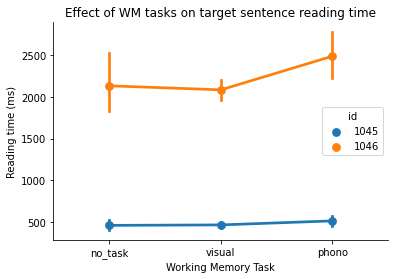

In [336]:
ax = sns.pointplot(data = df, x = 'condition', y = 'target', hue = 'id')
ax.set(title = 'Effect of WM tasks on target sentence reading time', xlabel = 'Working Memory Task', ylabel='Reading time (ms)')
sns.despine()

In [278]:
questions = df.loc[(df['response'] == 'j') | (df['response'] == 'n')]
questions = questions.drop_duplicates(subset=['id', 'trial'])
questions['correct'] = np.where( questions['question_correct'] == questions['response'] , '1', '0')
#questions

In [279]:
out = pd.DataFrame(questions[['id', 'correct']].groupby('id').value_counts()).reset_index()
out

,id,correct,0
0,1045,1,29
1,1045,0,1
2,1046,1,27
3,1046,0,3


In [298]:
phono = df.loc[(df['condition'] == 'phono') & (df['response'] != 'j') & (df['response'] != 'n')]
phono = phono.drop_duplicates(subset=['id', 'trial'])
phono[['phono_correct_response', 'response']] = phono[['phono_correct_response', 'response']].apply(pd.to_numeric)
phono['correct'] = np.where(phono['phono_correct_response'] == phono['response'] , '1', '0')
#phono

In [297]:
out = pd.DataFrame(phono[['id', 'correct']].groupby('id').value_counts()).reset_index()
out

,id,correct,0
0,1045,0,10
1,1046,0,6
2,1046,1,4


In [269]:
visual = df.loc[(df['condition'] == 'visual')]
#visual = visual.drop_duplicates(subset=['id'])
#visual

In [270]:


x = list(visual['xcoor'])

xloc = []
for i in x:
    if i == -448:
        xloc.append('farleft')
    elif i == -192:
        xloc.append('midleft')
    elif i == 224:
        xloc.append('midright')
    elif i == 448:
        xloc.append('farright')

y = list(visual['ycoor'])


yloc = []
for i in y:
    if i == -320:
        yloc.append('upper')
    elif i == 320:
        yloc.append('lower')
    elif i == 0:
        yloc.append('mid')
    else:
        yloc.append('na')


point_locations = []
for s, val in enumerate(xloc):
    if val == 'farleft':
        if yloc[s] == 'upper':
            point_locations.append(1)
        elif yloc[s] == 'lower':
            point_locations.append(5)
    elif val == 'farright':
        if yloc[s] == 'upper':
            point_locations.append(2)
        elif yloc[s] == 'lower':
            point_locations.append(6)
    elif val == 'midright':
        point_locations.append(4)
    elif val == 'midleft':
        point_locations.append(3)
        
        
visual['xloc'] = xloc
visual['yloc'] = yloc
visual['point_locations'] = point_locations
#visual

<ipython-input-270-46269a1f7717>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visual['xloc'] = xloc
<ipython-input-270-46269a1f7717>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visual['yloc'] = yloc
<ipython-input-270-46269a1f7717>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [271]:
visual

,id,block,condition,trial,question_correct,response,phono_correct_response,xcoor,ycoor,cursor_x,cursor_y,picker,target,xloc,yloc,point_locations
8,1046,experiment,visual,2.0,j,j,744929,-448.0,-320.0,-173.564517,-16.047311,1,2501.0,farleft,upper,1
9,1046,experiment,visual,2.0,j,j,744929,448.0,-320.0,-173.564517,-16.047311,1,2501.0,farright,upper,2
10,1046,experiment,visual,2.0,j,j,744929,-448.0,320.0,-173.564517,-16.047311,1,2501.0,farleft,lower,5
11,1046,experiment,visual,2.0,j,j,744929,-192.0,0.0,-173.564517,-16.047311,1,2501.0,midleft,mid,3
12,1046,experiment,visual,2.0,j,j,744929,224.0,0.0,-173.564517,-16.047311,1,2501.0,midright,mid,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,1045,experiment,visual,27.0,j,1,748290,448.0,320.0,462.476481,318.022821,0,226.0,farright,lower,6
378,1045,experiment,visual,27.0,j,1,748290,448.0,320.0,-205.663782,21.996263,0,226.0,farright,lower,6
379,1045,experiment,visual,27.0,j,1,748290,448.0,320.0,271.069751,13.674231,0,226.0,farright,lower,6
380,1045,experiment,visual,27.0,j,1,748290,448.0,320.0,-458.891320,296.623311,0,226.0,farright,lower,6


In [272]:
response_point = []
response_x = visual['cursor_x']
response_y = visual['cursor_y']
visual_response = pd.DataFrame({'response_x': visual['cursor_x'],
                               'response_y': visual['cursor_y']})
visual_response

,response_x,response_y
8,-173.564517,-16.047311
9,-173.564517,-16.047311
10,-173.564517,-16.047311
11,-173.564517,-16.047311
12,-173.564517,-16.047311
...,...,...
377,462.476481,318.022821
378,-205.663782,21.996263
379,271.069751,13.674231
380,-458.891320,296.623311


In [325]:
#list(raw)

In [330]:
df_sent = pd.DataFrame(raw[['jatosStudyResultId',
                            'count_trials_sequence',
                            'response_time_keyboard_S1',
                            'response_time_keyboard_S2A',
                            'response_time_keyboard_S2B', 
                            'response_time_keyboard_S3', 
                            'response_time_keyboard_S4',
                            'response_time_keyboard_S5', 
                            'response_time_keyboard_S6']])
df_sent = df_sent.drop_duplicates(subset=['jatosStudyResultId', 'count_trials_sequence'])

df_sent = pd.melt(df_sent, id_vars=[ 'jatosStudyResultId', 'count_trials_sequence'])

In [331]:
df_sent

,jatosStudyResultId,count_trials_sequence,variable,value
0,1046,0.0,response_time_keyboard_S1,3690.0
1,1046,1.0,response_time_keyboard_S1,2126.0
2,1046,2.0,response_time_keyboard_S1,2126.0
3,1046,3.0,response_time_keyboard_S1,2424.0
4,1046,4.0,response_time_keyboard_S1,1771.0
...,...,...,...,...
415,1045,25.0,response_time_keyboard_S6,793.0
416,1045,26.0,response_time_keyboard_S6,434.0
417,1045,27.0,response_time_keyboard_S6,434.0
418,1045,28.0,response_time_keyboard_S6,464.0


<AxesSubplot:xlabel='value', ylabel='variable'>

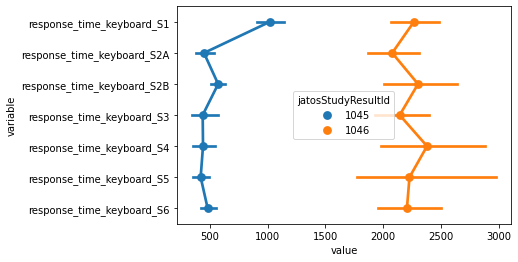

In [335]:
sns.pointplot(data = df_sent, y = 'variable', x = 'value', hue = 'jatosStudyResultId')